import numpy, pandas, seaborn libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

read csv file and import it as a dataframe

In [2]:
data = pd.read_csv("test_2umaH9m.csv")

In [3]:
#finding out how many missing values(null values) in dataset
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

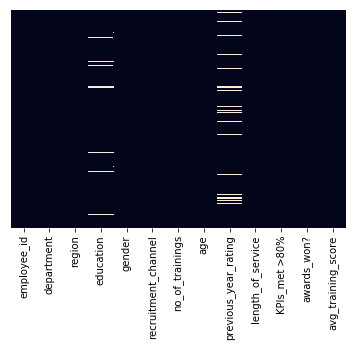

In [4]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

Here the missing values of previous_years_rating can be filled approximatedly
as they are dependent on other column values:
1.'is_promoted',
2.'KPIs_met >80%' and
3.'awards won'

Replacing null values of previous_year_rating with the following condition:
1. if previous_year_rating is null and 'KPIs_met >80%' then previous_year_rating can take value 4.
2. if previous_year_rating is null and 'awards_won'=1 then previous_year_rating can take value 4.

In [5]:
data.loc[(data['KPIs_met >80%'] == 1) & (pd.isnull(data.previous_year_rating)),'previous_year_rating'] = 4
data.loc[(data['awards_won?'] == 1) & (pd.isnull(data.previous_year_rating)),'previous_year_rating'] = 4

In [6]:
data['previous_year_rating'].fillna(3, inplace=True)

In [7]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [8]:
education = pd.get_dummies(data.education, drop_first=True)

In [9]:
education.head()

,Below Secondary,Master's & above
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [10]:
region = pd.get_dummies(data.region,drop_first=True)
trainings = pd.get_dummies(data.no_of_trainings,drop_first=True)
rating = pd.get_dummies(data.previous_year_rating,drop_first=True)
department = pd.get_dummies(data.department,drop_first=True)
gender = pd.get_dummies(data.gender,drop_first=True)
recruitment_channel = pd.get_dummies(data.recruitment_channel,drop_first=True)

In [11]:
testdata = pd.concat([data,region,education,department,trainings, gender,rating,recruitment_channel], axis=1)

In [12]:
testdata.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,7,8,9,m,2.0,3.0,4.0,5.0,referred,sourcing
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,4.0,1,...,0,0,0,1,0,0,1,0,0,1
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,...,0,0,0,0,0,1,0,0,0,0
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,...,0,0,0,1,0,0,0,0,0,0
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,...,0,0,0,0,1,0,0,0,0,0
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,...,0,0,0,1,0,0,1,0,0,1


In [13]:
testdata = testdata.drop(columns=['department','region','education','gender','recruitment_channel','no_of_trainings','previous_year_rating'])

In [14]:
testdata.to_csv('test-data-coded.csv')

In [15]:
testdata.head()

,employee_id,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,region_10,region_11,region_12,region_13,...,7,8,9,m,2.0,3.0,4.0,5.0,referred,sourcing
0,8724,24,1,1,0,77,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,74430,31,5,0,0,51,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,72255,31,4,0,0,47,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,38562,31,9,0,0,65,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,64486,30,7,0,0,61,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
